In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

In [2]:
df = pd.read_csv("/content/trainset.csv")

In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [5]:
train = df.iloc[:,1:2].values

In [6]:
type(train)

numpy.ndarray

In [7]:
train.shape

(1259, 1)

In [8]:
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [9]:
train_scaled.shape

(1259, 1)

In [10]:
x_train_array = []
y_train_array = []
for i in range(60,1259):
  x_train_array.append(train_scaled[i-60:i,0])
  y_train_array.append(train_scaled[i,0])
x_train = np.array(x_train_array)
y_train  = np.array(y_train_array)
x_train1 = x_train.reshape((x_train.shape[0],x_train.shape[1],1))

In [11]:
x_train.shape

(1199, 60)

In [12]:
length = 60
n_features = 1

In [13]:
model = Sequential()
model.add(layers.SimpleRNN(60,input_shape = (length,n_features)))
model.add(layers.Dense(1))

In [14]:
model.compile(optimizer = 'adam',loss = 'mse')

In [15]:
model.fit(x_train1,y_train,epochs =15, batch_size =32)

Epoch 1/15
38/38 [==============================] - 4s 45ms/step - loss: 0.0339
Epoch 2/15
38/38 [==============================] - 2s 48ms/step - loss: 7.2153e-04
Epoch 3/15
38/38 [==============================] - 1s 34ms/step - loss: 6.3222e-04
Epoch 4/15
38/38 [==============================] - 1s 36ms/step - loss: 6.2173e-04
Epoch 5/15
38/38 [==============================] - 1s 36ms/step - loss: 5.6575e-04
Epoch 6/15
38/38 [==============================] - 1s 36ms/step - loss: 5.2972e-04
Epoch 7/15
38/38 [==============================] - 1s 35ms/step - loss: 5.2359e-04
Epoch 8/15
38/38 [==============================] - 1s 35ms/step - loss: 4.8730e-04
Epoch 9/15
38/38 [==============================] - 1s 36ms/step - loss: 4.8660e-04
Epoch 10/15
38/38 [==============================] - 2s 61ms/step - loss: 4.8619e-04
Epoch 11/15
38/38 [==============================] - 1s 33ms/step - loss: 4.4383e-04
Epoch 12/15
38/38 [==============================] - 1s 36ms/step - loss: 4.20

In [16]:
df1 = pd.read_csv("/content/testset.csv")

In [17]:
test = df1.iloc[:,1:2].values

In [18]:
test.shape

(125, 1)

In [19]:
df1_total = pd.concat((df['Open'],df1['Open']),axis = 0)

In [25]:
inputs = df1_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled = sc.transform(inputs)
x_test = []
y_test = []
for i in range(60,1384):
  x_test.append(inputs_scaled[i-60:i,0])
  y_test.append(inputs_scaled[i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [21]:
x_test.shape

(1324, 60, 1)

In [22]:
pred = model.predict(x_test)
pred_scaled = sc.inverse_transform(pred)
print(pred_scaled)

42/42 [==============================] - 0s 6ms/step
[[ 410.90353]
 [ 408.55875]
 [ 402.7417 ]
 ...
 [1123.0525 ]
 [1116.0653 ]
 [1113.166  ]]


YAMUNAASRI 212222240117


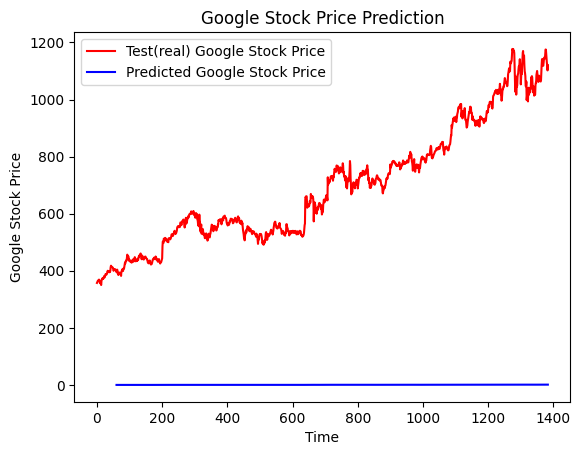

In [28]:
print("YAMUNAASRI 212222240117")
plt.plot(np.arange(0,1384),inputs, color='red',label='Test(real) Google Stock Price')
plt.plot(np.arange(60,1384),pred,color='blue',label = 'Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error as mse
print("YAMUNAASRI 212222240117")
print(mse(y_test,pred))

YAMUNAASRI 212222240117
0.0005060162119616489
